In [15]:
import pandas as pd

df = pd.read_csv("../sukkiri-ml-codes/datafiles/ex2.csv")

In [16]:
df

,x0,x1,x2,x3,target
0,-1.244674,1.452124,-1.184385,-0.839169,1
1,-1.662920,-0.375804,-0.956673,0.380114,0
2,-1.926513,NaN,-1.203904,-0.728801,1
3,-1.455014,-0.472972,0.500495,-0.809670,0
4,-1.255422,1.348182,0.827424,-0.334090,1
...,...,...,...,...,...
95,-0.988204,0.934396,0.131865,-0.158939,1
96,-2.057470,2.869821,-0.887651,-0.741163,1
97,-1.669722,2.168812,-0.018603,0.607099,1
98,-1.011851,0.973641,-0.474993,-0.509644,1


In [17]:
# 行数と列数
df.shape

(100, 5)

In [18]:
# targetのデータ

df["target"].value_counts()

target
1    80
0    20
Name: count, dtype: int64

In [19]:
# 欠損値の確認

df.isnull().sum()

x0        0
x1        1
x2        1
x3        0
target    0
dtype: int64

In [20]:
# 欠損値を中央値で穴埋めする

df2 = df.fillna(df.mean())

In [23]:
df2

,x0,x1,x2,x3,target
0,-1.244674,1.452124,-1.184385,-0.839169,1
1,-1.662920,-0.375804,-0.956673,0.380114,0
2,-1.926513,0.598751,-1.203904,-0.728801,1
3,-1.455014,-0.472972,0.500495,-0.809670,0
4,-1.255422,1.348182,0.827424,-0.334090,1
...,...,...,...,...,...
95,-0.988204,0.934396,0.131865,-0.158939,1
96,-2.057470,2.869821,-0.887651,-0.741163,1
97,-1.669722,2.168812,-0.018603,0.607099,1
98,-1.011851,0.973641,-0.474993,-0.509644,1


In [24]:
# 特徴量と正解データへの分割

x = df2[["x0", "x1", "x2", "x3"]]
t = df2["target"]


In [25]:
x

,x0,x1,x2,x3
0,-1.244674,1.452124,-1.184385,-0.839169
1,-1.662920,-0.375804,-0.956673,0.380114
2,-1.926513,0.598751,-1.203904,-0.728801
3,-1.455014,-0.472972,0.500495,-0.809670
4,-1.255422,1.348182,0.827424,-0.334090
...,...,...,...,...
95,-0.988204,0.934396,0.131865,-0.158939
96,-2.057470,2.869821,-0.887651,-0.741163
97,-1.669722,2.168812,-0.018603,0.607099
98,-1.011851,0.973641,-0.474993,-0.509644


In [26]:
t

0     1
1     0
2     1
3     0
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int64

In [27]:
# 学習データとテストデータへの分割

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)

In [29]:
# 決定木モデルの作成

from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [30]:
# モデルの正解率を計算

model.score(x_test, y_test)

0.95

In [31]:
# 新規データの予測

model.predict([[1.56, 0.23, -1.1, 2.8]])

/opt/homebrew/Caskroom/miniforge/base/envs/sukkiri/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
# モデルの保存

import pickle
with open("part5ex.pkl", "wb") as f:
    pickle.dump(model, f)

[Text(0.6, 0.875, 'x1 <= -0.353\ngini = 0.305\nsamples = 80\nvalue = [15, 65]'),
 Text(0.4, 0.625, 'x0 <= -0.111\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.6, 0.375, 'x0 <= 0.158\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 64\nvalue = [0, 64]')]

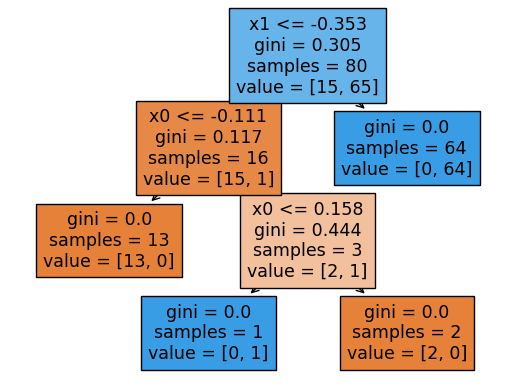

In [33]:
# 決定木モデルの描画

from sklearn.tree import plot_tree
plot_tree(model, feature_names = x_train.columns, filled = True)